# Практическое задание №1 по курсу "Основы математического моделирования"

# Вариант №19

## Выполнил студент 317 группы Мозеров Даниил


### 1.Постановка задачи

Используя схему бегущего счета и итерационные методы, решить задачу:
\begin{equation}
    \frac{\mathrm{\partial} \, u}{\mathrm{\partial} \,t} + \frac{2ue^{u^2}}{1 + e^{2u^2}}\frac{\mathrm{\partial} \,u}{\mathrm{\partial} \,x} = 0, \quad 0 < x \leq 1 \\
    u(x,0) = x^2 + 1 \\ 
    u(0,t) = e^{-t}
    \label{eq:ref1} \tag{1}
\end{equation}


### 2.Анализ задачи

Данная задача является квазилинейным уравнением переноса.
Получим уравнение характеристик для данной задачи и построим эти характеристики:

\begin{equation}
    \frac{\mathrm{d}\,t}{1} = \frac{1 + e^{2u^2}}{2ue^{u^2}}\frac{\mathrm{d}\,x}{1} = \frac{\mathrm{d}\,u}{0}
    \label{eq:ref2} \tag{2}
\end{equation}

Из этих уравнений получаем:

\begin{equation}
    u = u^* = const \\
    \int\limits_{t_0}^t \mathrm{d}\,t = \int\limits_{x_0}^x \frac{1 + e^{2u^{*2}}}{2u^*e^{u^{*2}}}\mathrm{d}\,x
     \label{eq:ref3} \tag{3} 
\end{equation}

Отсюда напрямую получается следующее выражение:

\begin{equation}
    t - t_0 = \frac{1 + e^{2u^{*2}}}{2u^*e^{u^{*2}}}(x - x_0)
    \label{eq:ref4} \tag{4}
\end{equation}

Из этого уравнения можно выразить два семейства кривых:

1) $t_0 = 0$. 
В этом случае $u^* = x_0^2 + 1$, а уравнение семейства имеет следующий вид:

\begin{equation}
    t = \frac{1 + e^{2(x_0^2 + 1)^2}}{2(x_0^2 + 1)e^{(x_0^2 + 1)^2}}(x - x_0)
    \label{eq:ref5} \tag{5}
\end{equation}

2) $x_0 = 0$.
В этом случае $u^* = e^{-t_0}$, а уравнение семейства имеет следующий вид:


\begin{equation}
    t = \frac{1 + e^{2e^{-2t_0}}}{2e^{-t_0}e^{e^{-2t_0}}}x + t_0
    \label{eq:ref6} \tag{6}
\end{equation}

Построим получившиеся характеристики и посмотрим, что они из себя представляют:

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# характеристики при t0 = 0; x0 взято с шагом 0.1 на промежутке [0; 1].
def ch1(x):
    return [((1. + np.exp(2 * (x0**2+1.)**2))/(2 * (x0 ** 2 + 1.) * np.exp((x0**2+1.)**2))) * (x - x0) for x0 in np.arange(0, 1.1, 0.1)]

# характеристики при x0 = 0; t0 взято с шагом 0.1 на промежутке [0; 1].
def ch2(x):
    return [((1. +  np.exp(2. * np.exp (-2. * t0)) )/(2 * np.exp(-t0) * np.exp(np.exp(-2.* t0)))) * x + t0 for t0 in np.arange(0, 1.1, 0.1)]

# Координата x принадлежит [0; 1], поэтому создаем соответствующий массив
x_arr = np.arange(0, 1.1, 0.1)

# Передаем этот массив в функции, строящие характеристики
ch1_arr = [ch1(x) for x in x_arr]
ch2_arr = [ch2(x) for x in x_arr]

Сначала строим характеристики для случая $t_0 = 0$:

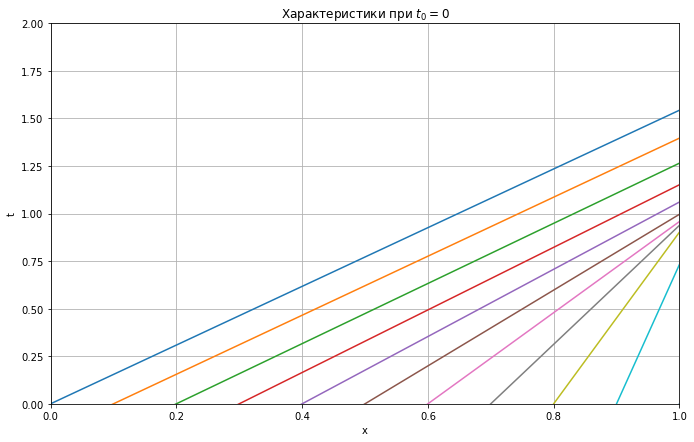

In [57]:
plt.figure(figsize=(11.27, 7))
plt.ylim(0,2) #диапазон изменения координаты t
plt.xlim(0,1) #диапазон изменения координаты x
plt.plot(x_arr, ch1_arr)
plt.title('Характеристики при $t_0 = 0$')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)

Теперь для случая $x_0 = 0$:

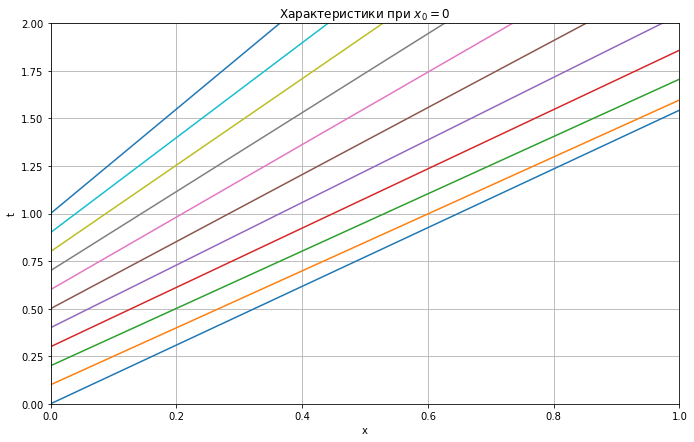

In [58]:
plt.figure(figsize=(11.27, 7))
plt.ylim(0,2) #диапазон изменения координаты t
plt.xlim(0,1) #диапазон изменения координаты x
plt.plot(x_arr, ch2_arr) 
plt.title('Характеристики при $x_0 = 0$')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)

А теперь выведем все характеристики на один график:

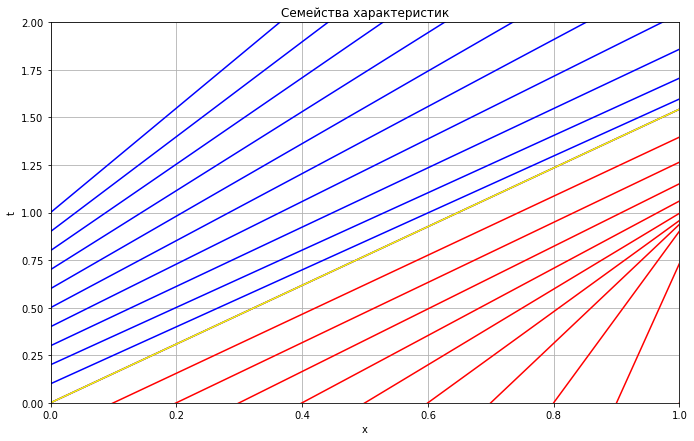

In [59]:
plt.figure(figsize=(11.27, 7))
plt.ylim(0,2) #диапазон изменения координаты t
plt.xlim(0,1) #диапазон изменения координаты x
plt.plot(x_arr, ch1_arr, color='red')
plt.plot(x_arr, ch2_arr, color='blue')
plt.plot(x_arr, (1 + np.exp(2))/(2 * np.exp(1)) * x_arr, color='yellow')
plt.title('Семейства характеристик')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)

Желтым цветом здесь выделена характеристика, которая разграничивает два семейства:

$t_0 = 0, x_0 = 0$, откуда получаем:

\begin{equation}
    t = \frac{1 + e^2}{2e}
    \label{eq:ref7} \tag{7}
\end{equation}

Характеристики являются прямыми линиями, которые не пересекаются в заданной области (в качестве промежутка времени выберем $[0;2]$), а это значит, что решение будет единственным.

### 3.Решение задачи с использованием разностных схем

#### 3.1. Сетка

Введем в области $\Omega  = \{(x,t): 0 < x \leq 1, \, 0 \leq t \leq 2\}$ равномерную сетку с шагом по времени $\tau$ и по координате $h$ :

\begin{equation}
    \omega^h = \{x_n = nh; n = 0,1,\dots,N-1    \}\\
    \omega^τ = \{t_m = mτ; m = 0,1,\dots,M-1  \}\\
    \omega^{hτ} = w^h w^τ
    \label{eq:ref8} \tag{8}
\end{equation}

Преобразуем наше исходное уравнение к следующему виду:

\begin{equation}
    \frac{\mathrm{\partial} \, u}{\mathrm{\partial} \,t} + \frac{\mathrm{\partial}}{\mathrm{\partial} \,x}(arctg({e^{u^2}})) = 0\\
    \label{eq:ref9} \tag{9}
\end{equation}

#### 3.2. Шаблон №3

Задачу будем решать с использованием следующего трехточечного шаблона (на картинке индекс m соответствует нашему n и наоборот; произошло это потому, что писал уравнения по тетради, а там немного другие индексы):

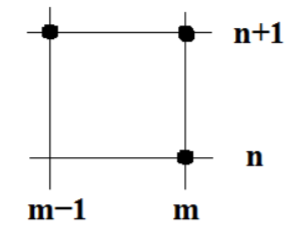

In [23]:
from IPython.display import Image
Image("template3.png")

Схема бегущего счета, соответствующая данному шаблону, безусловно устойчива, а также обладает первым порядком точности аппроксимации.

Определим сеточную функцию $y_h = y_h(x_k),\, x_k \in \, \omega^h $. С учетом выбранного шаблона имеем следующее уравнение:

\begin{equation}
    \frac{y_n^{m+1} - y_n^m}{τ} + \frac{arctg(e^{(y_n^{m+1})^2}) - arctg(e^{(y_{n-1}^{m+1})^2})}{h} = 0, \, \{n = 0,1,\dots,N-1; m = 0,1,\dots,M-1\}
    \label{eq:ref10} \tag{10}
\end{equation}

При этом начальные и граничные условия принимают вид:

\begin{equation}
    y_n^0 = x_n^2 + 1, \, \{n = 0,1,\dots,N-1\}\\
    y_0^m = e^{-t_m}, \, \{m = 0,1,\dots,M-1\}
    \label{eq:ref11} \tag{11}
\end{equation}

Уравнение (10) является уравнением относительно $y_n^{m + 1}$, которое мы будем решать методом Ньютона (методом касательных). Введем следующую функцию:

\begin{equation}
    f(y_n^{m + 1}) =  \frac{y_n^{m+1} - y_n^m}{τ} + \frac{arctg(e^{(y_n^{m+1})^2}) - arctg(e^{(y_{n-1}^{m+1})^2})}{h} = 0, \, \{n = 0,1,\dots,N-1; m = 0,1,\dots,M-1\}
    \label{eq:ref12} \tag{12}
\end{equation}

Пусть известно некоторое приближение $ {y_n^{m + 1}}^{(s)}$ к корню $y_n^{m + 1}$. Тогда уравнение принимает вид $f({y_n^{m + 1}}^{(s)} + \Delta {y_n^{m + 1}}^{(s)}) = 0$, где $\Delta {y_n^{m + 1}}^{(s)} = y_n^{m + 1} - {y_n^{m + 1}}^{(s)}$. После разложения и линеаризации данного уравнения, получаем:

\begin{equation}
    f'({y_n^{m + 1}}^{(s)})\Delta {y_n^{m + 1}}^{(s)} = -f({y_n^{m + 1}}^{(s)})
    \label{eq:ref13} \tag{13}
\end{equation}

Следовательно

\begin{equation}
    {y_n^{m + 1}}^{(s + 1)} = {y_n^{m + 1}}^{(s)} -\frac{f({y_n^{m + 1}}^{(s)})}{f'({y_n^{m + 1}}^{(s)})}
    \label{eq:ref14} \tag{14}
\end{equation}

Данный итерационный процесс заканчивается по достижении заданной точности $\varepsilon$: $|\Delta {y_n^{m + 1}}^{(s)}| < \varepsilon$.

#### 3.3 Исполняемый код шаблона №3 и визуализация полученных решений

Приведем соотвествующий программный код. Схема является безусловно устойчивой, поэтому никаких дополнительных условий на шаги сетки накладывать не нужно.

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

N = 100 #количество x
M = 100 #количество t

X = 1  #максимальное значение x
T = 2 #конечный момент t

y1 = np.zeros((N,M), dtype = float) #создаем массив нулей
x1 = np.linspace(0, X, N) #заполняем массив координат
t1 = np.linspace(0, T, M) #заполняем временной массив

h = float (X)/(N-1) #шаг по координате (сетка равномерная)
τ = float (T)/(M-1) #шаг по времени (сетка равномерная)
ε = 0.0001 #невязка для метода Ньютона

y1[:,0] = x1 ** 2 + 1. #начальное условие
y1[0, :] = np.exp(-t1) #граничное условие

def p(x): #то, что содержится под частной производной по х в преобразованном уравнении переноса
    return np.arctan(np.exp(x**2))

def Dp(x): #производная от функции p(x) (зависит только от x)
    return 2 * x * np.exp(x**2)/(1 + np.exp(2 * x**2))

def f(x, a, b): #a,b - параметры, которые являются известными значениями функции в трехточечном шаблоне
    return (x-a)/τ + (p(x)-p(b))/h

def Df(x): #производная от функции f(x, a, b) (зависит только от x)
    return 1/τ + Dp(x)/h

def solve(a, b): #функция, реализующая метод Ньютона
    result = b; #берем такое начальное приближение
    d = ε + 1; #просто для захода в цикл
    while(d>ε):
        y1 = result
        result = y1 - f(y1, a, b)/Df(y1)
        d = abs(y1 - result)
    return result

for i in range(1,N): #заполняем массив вычисленными значениями сеточной функции
    for j in range(1,M):
        y1[i,j] = solve(y1[i,j-1], y1[i-1, j])
        


Визуализируем решение:

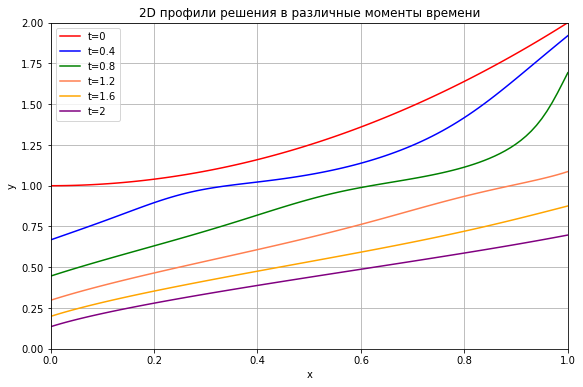

In [217]:
plt.figure(figsize=(9.27, 6))
plt.ylim(0,2) #диапазон изменения координаты y
plt.xlim(0,1)
plt.grid()
plt.plot(x1, y1[:,0],'red', label = 't=0')
plt.plot(x1, y1[:,20], 'blue', label = 't=0.4') 
plt.plot(x1, y1[:,40], 'green', label = 't=0.8') 
plt.plot(x1, y1[:,60], 'Coral', label = 't=1.2') 
plt.plot(x1, y1[:,80], 'orange', label = 't=1.6') 
plt.plot(x1, y1[:,99], 'Purple', label = 't=2' );
plt.ylabel('y');
plt.xlabel('x');
plt.title('2D профили решения в различные моменты времени');
plt.legend(loc='upper left', ncol=1);

Теперь увеличим число узлов сетки: 

In [218]:
N = 500 #количество x
M = 500 #количество t    

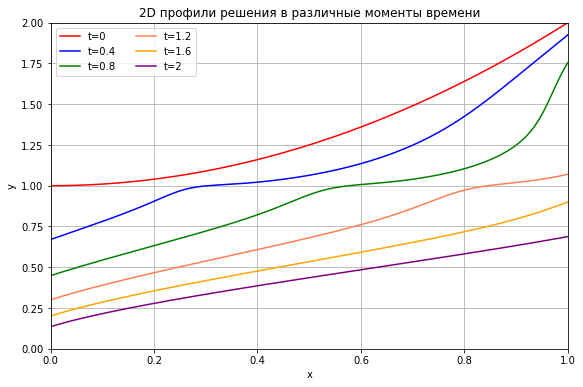

In [219]:
plt.figure(figsize=(9.27, 6))
plt.ylim(0,2) #диапазон изменения координаты y
plt.xlim(0,1)
plt.grid()
plt.plot(x, y[:,0],'red', label = 't=0')
plt.plot(x, y[:,100], 'blue', label = 't=0.4') 
plt.plot(x, y[:,200], 'green', label = 't=0.8') 
plt.plot(x, y[:,300], 'Coral', label = 't=1.2') 
plt.plot(x, y[:,400], 'orange', label = 't=1.6') 
plt.plot(x, y[:,499], 'Purple', label = 't=2' );
plt.ylabel('y');
plt.xlabel('x');
plt.title('2D профили решения в различные моменты времени');
plt.legend(loc='upper left', ncol=2);

И еще раз уменьшим шаг сетки:

In [220]:
N = 1000 #количество x
M = 1000 #количество t

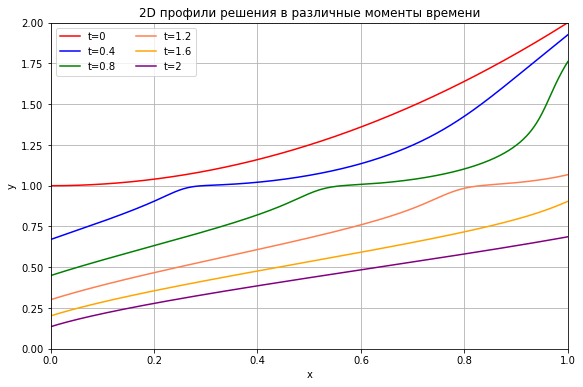

In [221]:
plt.figure(figsize=(9.27, 6))
plt.ylim(0,2) #диапазон изменения координаты y
plt.xlim(0,1)
plt.grid()
plt.plot(x2, y2[:,0],'red', label = 't=0')
plt.plot(x2, y2[:,200], 'blue', label = 't=0.4') 
plt.plot(x2, y2[:,400], 'green', label = 't=0.8') 
plt.plot(x2, y2[:,600], 'Coral', label = 't=1.2') 
plt.plot(x2, y2[:,800], 'orange', label = 't=1.6') 
plt.plot(x2, y2[:,999], 'Purple', label = 't=2' );
plt.ylabel('y');
plt.xlabel('x');
plt.title('2D профили решения в различные моменты времени');
plt.legend(loc='upper left', ncol=2);

А теперь для нескольких моментов времени выведем профили решений, полученных на 3 различных сетках: 

сетка $№1 - M,N = 100$; \
сетка $№2 - M,N = 500$; \
сетка $№3 - M,N = 1000$

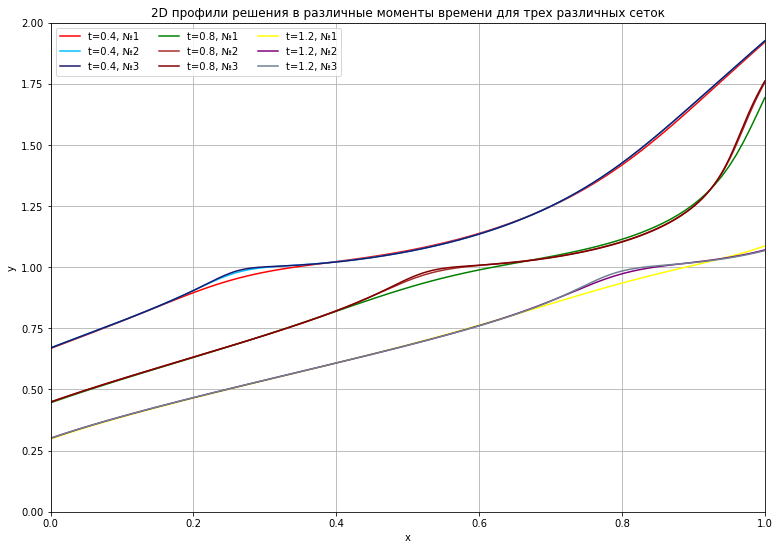

In [222]:
plt.figure(figsize=(12.8, 9));
plt.ylim(0,2) #диапазон изменения координаты y
plt.xlim(0,1)
plt.grid()
plt.plot(x1, y1[:,20], 'red', label = 't=0.4, №1');
plt.plot(x, y[:,100], 'DeepSkyBlue', label = 't=0.4, №2'); 
plt.plot(x2, y2[:,200], '#191970', label = 't=0.4, №3');
plt.plot(x1, y1[:,40], 'green', label = 't=0.8, №1');
plt.plot(x, y[:,200], 'brown', label = 't=0.8, №2');
plt.plot(x2, y2[:,400], 'Maroon', label = 't=0.8, №3');
plt.plot(x1, y1[:,60], 'yellow', label = 't=1.2, №1');
plt.plot(x, y[:,300], 'Purple', label = 't=1.2, №2');
plt.plot(x2, y2[:,600], 'SlateGrey', label = 't=1.2, №3');
plt.title('2D профили решения в различные моменты времени для трех различных сеток');
plt.ylabel('y');
plt.xlabel('x');
plt.legend(loc='upper left', ncol=3);

Из визуального сравнения графиков видно, что решения, полученные на трех различных сетках, совпадают практически во всей исследуемой области. Исключение, вероятно, составляют участки "набегания" волны. Как можно увидеть, при небольшом числе узлов получается более сглаженное решение.

#### 3.4 Шаблон №4

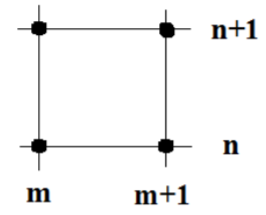

In [84]:
Image("template4.png")

Теперь решим задачу с помощью четырехточечного шаблона (на картинке индекс m соответствует нашему n и наоборот). Схема бегущего счета, соответствующая данному шаблону, также безусловно устойчива и обладает вторым порядком точности аппроксимации.

С учетом выбранного шаблона получаем следующее уравнение:

\begin{equation}
    \frac{1}{2}\{\frac{y_n^{m+1}-y_n^m+y_{n+1}^{m+1}-y_{n+1}^m}{\tau}\} + \frac{1}{2}\{\frac{arctg(e^{(y_{n+1}^{m+1})^2}) - arctg(e^{(y_{n}^{m+1})^2}) + arctg(e^{(y_{n+1}^m)^2}) - arctg(e^{(y_n^m)^2})}{h}        \} = 0
    \label{eq:ref14} \tag{14}
\end{equation}

Решать задачу будем вновь методом Ньютона с новой функцией $\tilde f(y_{n+1}^{m + 1})$.

#### 3.5 Исполняемый код шаблона №4 и визуализация полученных решений

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

N = 1000 #количество x
M = 1000 #количество t

X = 1  #максимальное значение x
T = 2 #конечный момент t

y3 = np.zeros((N,M), dtype = float) #создаем массив нулей
x3 = np.linspace(0, X, N) #заполняем массив тем, что будет равномерно изменяться от нуля до максимального значения
t3 = np.linspace(0, T, M)

h = float (X)/(N-1) #шаг по координате (сетка равномерная)
τ = float (T)/(M-1) #шаг по времени (сетка равномерная)
ε = 0.0001 #невязка

y3[:,0] = x3 ** 2 + 1 #граничные условия по t (при t=0)
y3[0, :] = np.exp(-t3) #граничные условия по x (при x=0)

def p(x): #то, что содержится под частной производной по х в преобразованном уравнении переноса
    return np.arctan(np.exp(x**2))

def Dp(x): #производная от функции p(x)
    return 2 * x * np.exp(x**2)/(1 + np.exp(2 * x**2))

def f(x, a, b, c): #a,b,c - параметры, которые являются известными значениями функции в четырехточечной схеме
    return 1/2 * ((b-a)/τ + (x-c)/τ) + 1/2 * ((p(x)-p(b))/h +(p(c)-p(a))/h)
                   
def Df(x): 
    return Dp(x)/(2 * h) + 1/(2 * τ)

def solve(a, b, c): #функция, реализующая метод Ньютона
    result = b; #берем такое начальное приближение
    d = ε + 1; 
    while(d>ε):
        y3 = result
        result = y3 - f(y3, a, b, c)/Df(y3)
        d = abs(y3 - result)
    return result

for i in range(1,N): #заполняем массив вычисленными значениями сеточной функции
    for j in range(1,M):
        y3[i,j] = solve(y3[i-1,j-1], y3[i-1, j], y3[i, j-1])

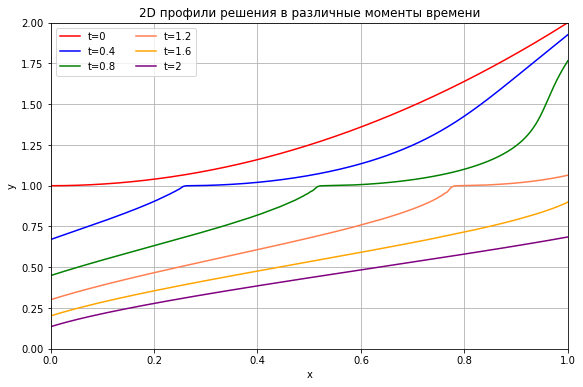

In [224]:
plt.figure(figsize=(9.27, 6))
plt.ylim(0,2) #диапазон изменения координаты y
plt.xlim(0,1)
plt.grid()
plt.plot(x3, y3[:,0],'red', label = 't=0');
plt.plot(x3, y3[:,200], 'blue', label = 't=0.4');
plt.plot(x3, y3[:,400], 'green', label = 't=0.8'); 
plt.plot(x3, y3[:,600], 'Coral', label = 't=1.2'); 
plt.plot(x3, y3[:,800], 'orange', label = 't=1.6');
plt.plot(x3, y3[:,999], 'Purple', label = 't=2' );
plt.ylabel('y');
plt.xlabel('x');
plt.title('2D профили решения в различные моменты времени');
plt.legend(loc='upper left', ncol=2);

Теперь сравним решения, полученные на сетке $№3$ с помощью двух различных шаблонов:

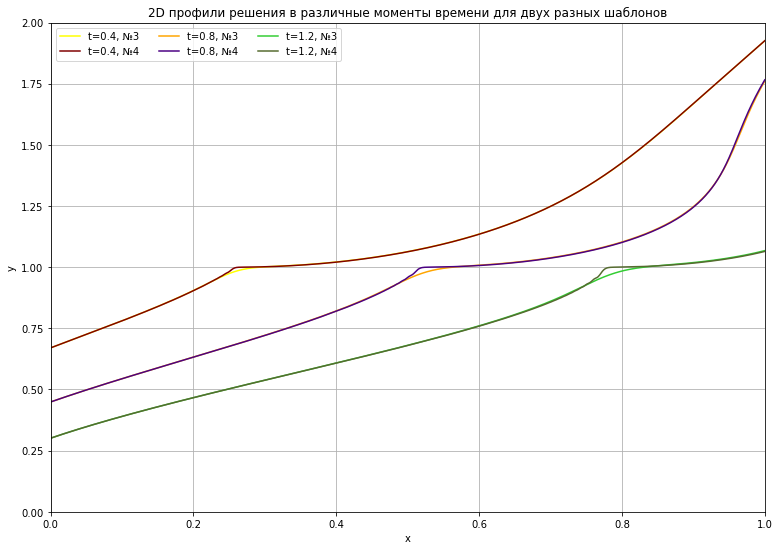

In [225]:
%matplotlib inline
plt.figure(figsize=(12.8, 9));
plt.ylim(0,2) 
plt.xlim(0,1)
plt.grid() 
plt.plot(x2, y2[:,200], 'yellow', label = 't=0.4, №3');
plt.plot(x3, y3[:,200], 'Maroon', label = 't=0.4, №4');
plt.plot(x2, y2[:,400], 'orange', label = 't=0.8, №3');
plt.plot(x3, y3[:,400], 'Indigo', label = 't=0.8, №4');
plt.plot(x2, y2[:,600], 'LimeGreen', label = 't=1.2, №3');
plt.plot(x3, y3[:,600], 'DarkOliveGreen', label = 't=1.2, №4');
plt.title('2D профили решения в различные моменты времени для двух разных шаблонов');
plt.ylabel('y');
plt.xlabel('x');
plt.legend(loc='upper left', ncol=3);

Из данного графика видно, что оба шаблона дают одинаковое решение практически во всей области, за исключением уже упомянутых выше участков "набегания" волны. При решении задачи с использованием четырехточечного шаблона, возникают небольшие ступеньки. Вероятно, это связано с тем, что данная схема является немонотонной. 
Ниже выведен график разности решений, полученных с помощью двух различных схем, который демонстрирует вышесказанное.

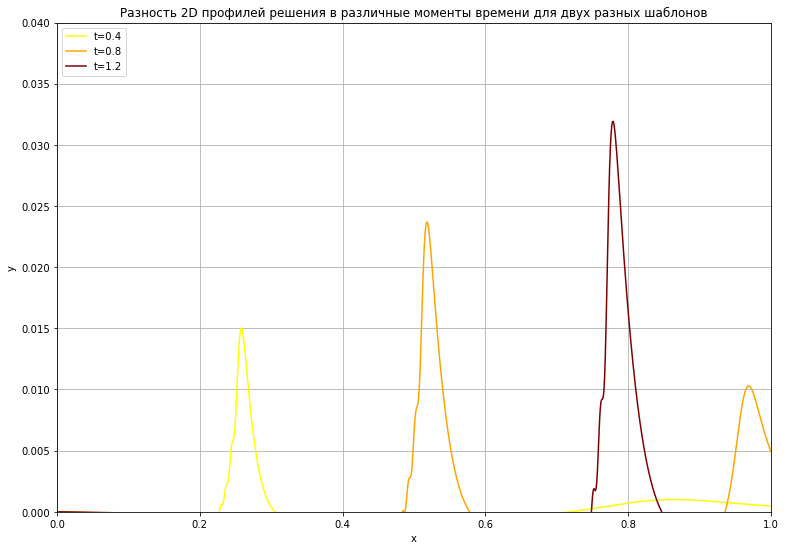

In [226]:
%matplotlib inline
plt.figure(figsize=(12.8, 9));
plt.ylim(0,0.04) 
plt.xlim(0,1)
plt.grid() 
plt.plot(x2, y3[:,200]-y2[:,200], 'yellow', label = 't=0.4');
plt.plot(x2, y3[:,400]-y2[:,400], 'orange', label = 't=0.8');
plt.plot(x2, y3[:,600]-y2[:,600], 'maroon', label = 't=1.2');
plt.title('Разность 2D профилей решения в различные моменты времени для двух разных шаблонов');
plt.ylabel('y');
plt.xlabel('x');
plt.legend(loc='upper left', ncol=1);

При желании можно произвести анимацию полученных решений (видео будут высланы дополнительным файлом).

### 4.Список литературы

1. Тихонов Н.А., Токмачев М.Г. Курс лекций "Основы математического моделирования". Части 1, 2 
2. Основы математического моделирования: основные понятия теории разностных схем, схемы бегущего счёта для линейных уравнений переноса, спектральный критерий устойчивости (http://math.phys.msu.ru/data/785/osnovnie_ponyatiya.pdf)